Data exploration

In [116]:
from pathlib import Path
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torchvision.transforms import v2

In [109]:
def view_image(file_path:str):
    file_path = Path(file_path)
    assert file_path.is_file()
    image = Image.open(file_path)
    display(image)

Load data

In [121]:
df_train = pd.read_csv("train_train.csv")
df_test = pd.read_csv("test.csv")

Data Frame

In [122]:
df_train

,Unnamed: 0.1,Unnamed: 0,filename,label
0,0,0,MV1012-BC-12_obj00001.jpg,0
1,2,2,MV1012-BC-12_obj00003.jpg,2
2,3,3,MV1012-BC-12_obj00004.jpg,3
3,4,4,MV1012-BC-12_obj00005.jpg,0
4,6,7,MV1012-BC-12_obj00008.jpg,4
...,...,...,...,...
4532,8646,12460,MV1012-BC-8_obj01908.jpg,1
4533,8647,12461,MV1012-BC-8_obj01909.jpg,0
4534,8650,12464,MV1012-BC-8_obj01912.jpg,1
4535,8651,12465,MV1012-BC-8_obj01913.jpg,9


Class distribution

In [21]:
class_counts = df_train["label"].value_counts().sort_index()
class_counts


label
0     2226
1     1444
2      471
3     1636
4       13
5     1044
6      157
7      370
8      164
9       34
10     449
11      76
12       1
13     128
14       6
15       3
16     178
17       5
18      19
19      64
20       7
21      25
22       3
23       9
24       3
25       6
26      41
27       5
28      13
29       7
30       2
31       3
32       1
33       2
34       4
35       2
36       1
37       2
38       1
39       2
40       2
41       2
42       2
44       5
45       1
46       1
47       1
48       2
50       4
51       4
52       1
53       1
Name: count, dtype: int64

Text(0.5, 0, 'class id')

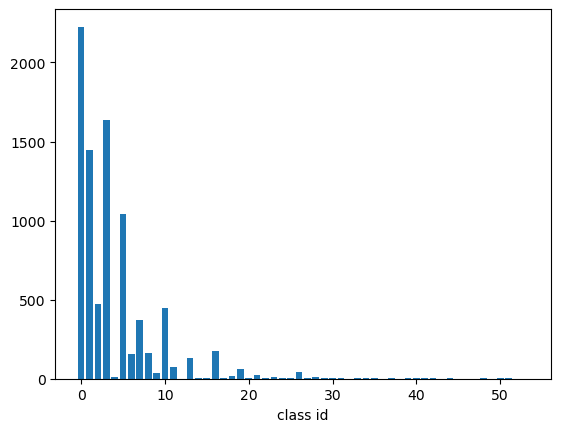

In [18]:
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("class id")

View some Pokemon

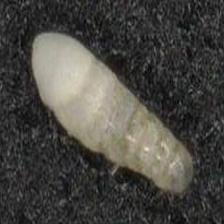

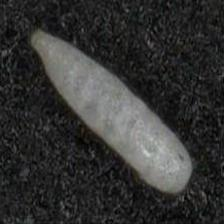

In [112]:
label = 40
num_to_view = 3

for relative_index in range(num_to_view):
    try:
        file_path = f"train/train/{df_train[df_train["label"]==label].iloc[relative_index]["filename"]}"
        view_image(file_path)
    except IndexError:
        pass    

Try augmentations

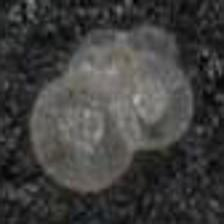

In [114]:
original_image = Image.open("train/train/MV1012-BC-12_obj00001.jpg")
original_image

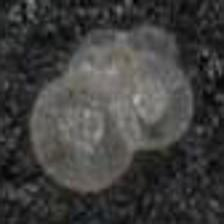

In [115]:
aug = v2.TrivialAugmentWide()
aug(original_image)